In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from pylab import rcParams
import urllib
import sklearn
from sklearn.linear_model import RidgeCV, LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('./data/cleaned_kc_house_data.csv')

In [3]:
np.median(df['price'])
df['price'].describe()

count    2.159500e+04
mean     5.402929e+05
std      3.673845e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [4]:
houses_under_500k = df.loc[df['price'] <= 500000]

In [5]:
houses_under_500k

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0,4.0,0.0,2.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,0.0,98028,47.7379,-122.233,2720,8062,0,3.0,0.0,2.0
6,257500.0,3,2.25,1715,6819,2.0,1715,1995,0.0,98003,47.3097,-122.327,2238,6819,0,4.0,0.0,2.0
7,291850.0,3,1.50,1060,9711,1.0,1060,1963,0.0,98198,47.4095,-122.315,1650,9711,0,4.0,0.0,2.0
8,229500.0,3,1.00,1780,7470,1.0,1050,1960,0.0,98146,47.5123,-122.337,1780,8113,730,4.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,360000.0,3,2.50,1530,1131,3.0,1530,2009,0.0,98103,47.6993,-122.346,1530,1509,0,5.0,0.0,2.0
21591,400000.0,4,2.50,2310,5813,2.0,2310,2014,0.0,98146,47.5107,-122.362,1830,7200,0,5.0,0.0,2.0
21592,402101.0,2,0.75,1020,1350,2.0,1020,2009,0.0,98144,47.5944,-122.299,1020,2007,0,4.0,0.0,2.0
21593,400000.0,3,2.50,1600,2388,2.0,1600,2004,0.0,98027,47.5345,-122.069,1410,1287,0,5.0,0.0,2.0


In [6]:
above_500k = df.loc[df['price'] > 500000]

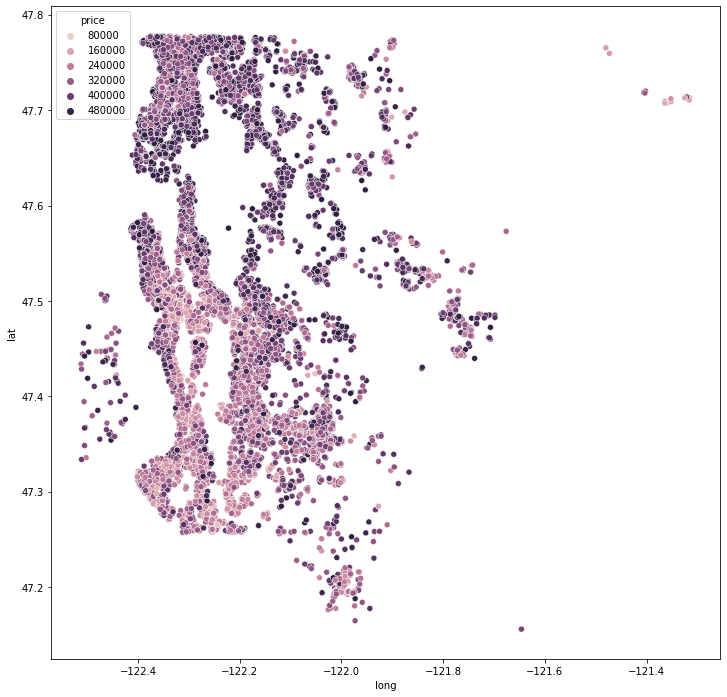

In [7]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=houses_under_500k,
               hue='price');

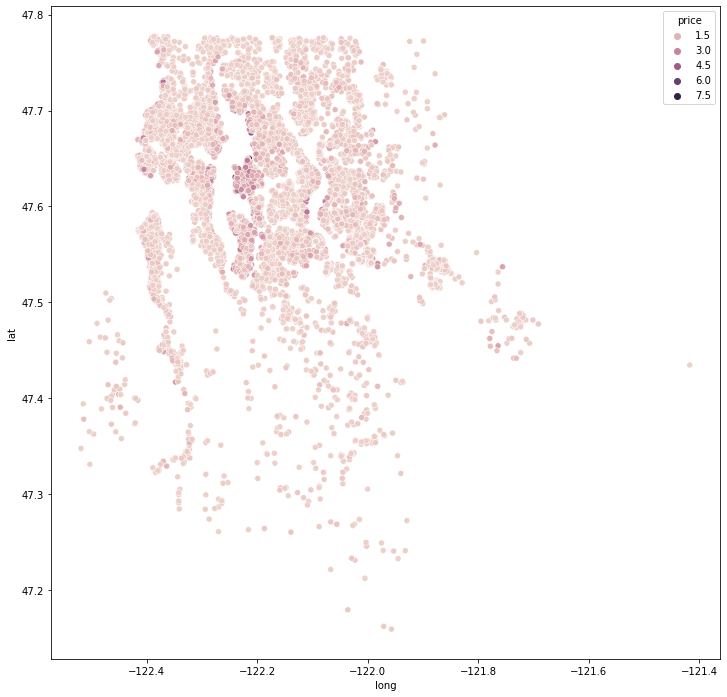

In [8]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=above_500k,
               hue='price',
               cmap='Oranges');

In [9]:
houses_under_500k['sqft_living'].describe()

count    12546.000000
mean      1668.947952
std        583.508820
min        370.000000
25%       1240.000000
50%       1600.000000
75%       2030.000000
max       5067.000000
Name: sqft_living, dtype: float64

In [10]:
above_500k['sqft_living'].describe()

count     9049.000000
mean      2650.621063
std        989.836522
min        680.000000
25%       1960.000000
50%       2520.000000
75%       3180.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [11]:
houses_under_500k['grades'].describe()

count    12546.000000
mean         4.113263
std          0.792555
min          0.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          8.000000
Name: grades, dtype: float64

In [12]:
above_500k['grades'].describe()

count    9049.000000
mean        5.413195
std         1.196816
min         2.000000
25%         5.000000
50%         5.000000
75%         6.000000
max        10.000000
Name: grades, dtype: float64

In [13]:
houses_under_500k['zipcode'].value_counts().nlargest(10)

98042    523
98038    519
98023    477
98133    441
98058    420
98118    395
98034    382
98155    365
98001    347
98092    326
Name: zipcode, dtype: int64

In [14]:
#top value counts for above 500k, this tells us 80% of those houses in this zipcode are above ~500k
len(houses_under_500k.loc[houses_under_500k['zipcode'] == 98052])

139

In [15]:
above_500k['zipcode'].value_counts().nlargest(10)

98052    435
98006    420
98115    376
98103    365
98074    355
98075    340
98033    339
98117    334
98004    316
98053    291
Name: zipcode, dtype: int64

In [16]:
houses_under_500k.loc[houses_under_500k['grades'] >= 7]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
769,405000.0,3,2.50,3170,12750,2.0,2360,1995,0.0,98023,47.3384,-122.336,2970,13125,810,7.0,0.0,2.0
1218,475000.0,4,3.50,3660,14401,2.0,2660,1994,0.0,98023,47.3076,-122.396,2780,10653,1000,7.0,0.0,2.0
1980,402500.0,4,2.50,2600,11951,2.0,2600,1988,0.0,98023,47.3053,-122.340,2820,12093,0,7.0,0.0,2.0
3771,472500.0,4,2.50,2960,223462,2.0,2960,2001,0.0,98030,47.3646,-122.211,2770,16482,0,7.0,0.0,2.0
5388,425000.0,3,2.50,2670,13218,1.0,2670,1988,0.0,98042,47.3683,-122.153,1960,13130,0,7.0,0.0,3.0
6140,420000.0,4,2.50,2480,8626,2.0,2480,2001,0.0,98001,47.3185,-122.262,2990,9033,0,7.0,0.0,2.0
6283,490000.0,4,2.50,3020,8302,2.0,3020,1994,0.0,98042,47.3630,-122.127,3020,8406,0,7.0,0.0,3.0
6899,465000.0,3,2.50,2870,25663,2.0,2870,1988,0.0,98003,47.2769,-122.333,2950,24347,0,7.0,0.0,2.0
7147,475000.0,4,2.50,3740,8700,1.0,2260,2004,0.0,98058,47.4587,-122.117,2650,6333,1480,7.0,0.0,2.0
7378,450000.0,3,2.50,1990,3478,2.0,1520,1990,0.0,98199,47.6361,-122.399,1710,6157,470,7.0,0.0,2.0


In [17]:
houses_under_500k.loc[houses_under_500k['grades'] >= 7]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
769,405000.0,3,2.50,3170,12750,2.0,2360,1995,0.0,98023,47.3384,-122.336,2970,13125,810,7.0,0.0,2.0
1218,475000.0,4,3.50,3660,14401,2.0,2660,1994,0.0,98023,47.3076,-122.396,2780,10653,1000,7.0,0.0,2.0
1980,402500.0,4,2.50,2600,11951,2.0,2600,1988,0.0,98023,47.3053,-122.340,2820,12093,0,7.0,0.0,2.0
3771,472500.0,4,2.50,2960,223462,2.0,2960,2001,0.0,98030,47.3646,-122.211,2770,16482,0,7.0,0.0,2.0
5388,425000.0,3,2.50,2670,13218,1.0,2670,1988,0.0,98042,47.3683,-122.153,1960,13130,0,7.0,0.0,3.0
6140,420000.0,4,2.50,2480,8626,2.0,2480,2001,0.0,98001,47.3185,-122.262,2990,9033,0,7.0,0.0,2.0
6283,490000.0,4,2.50,3020,8302,2.0,3020,1994,0.0,98042,47.3630,-122.127,3020,8406,0,7.0,0.0,3.0
6899,465000.0,3,2.50,2870,25663,2.0,2870,1988,0.0,98003,47.2769,-122.333,2950,24347,0,7.0,0.0,2.0
7147,475000.0,4,2.50,3740,8700,1.0,2260,2004,0.0,98058,47.4587,-122.117,2650,6333,1480,7.0,0.0,2.0
7378,450000.0,3,2.50,1990,3478,2.0,1520,1990,0.0,98199,47.6361,-122.399,1710,6157,470,7.0,0.0,2.0


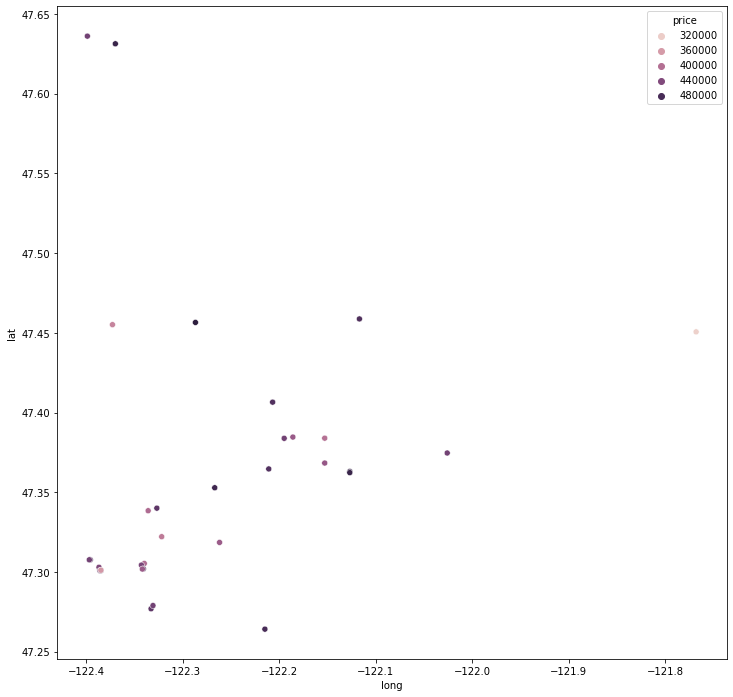

In [18]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=houses_under_500k.loc[houses_under_500k['grades'] >= 7],
               hue='price');

In [19]:
above_500k.loc[above_500k['grades'] < 7]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,4.0,0.0,2.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910,4.0,0.0,4.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0,5.0,0.0,2.0
10,662500.0,3,2.50,3560,9796,1.0,1860,1965,0.0,98007,47.6007,-122.145,2210,8925,1700,5.0,0.0,2.0
14,530000.0,5,2.00,1810,4850,1.5,1810,1900,0.0,98107,47.6700,-122.394,1360,4850,0,4.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,541800.0,4,2.50,3118,7866,2.0,3118,2014,0.0,98001,47.2931,-122.264,2673,6500,0,6.0,0.0,2.0
21581,810000.0,4,3.00,3990,7838,2.0,3990,2003,0.0,98053,47.6857,-122.046,3370,6814,0,6.0,0.0,2.0
21585,507250.0,3,2.50,2270,5536,2.0,2270,2003,0.0,98065,47.5389,-121.881,2270,5731,0,5.0,0.0,2.0
21587,610685.0,4,2.50,2520,6023,2.0,2520,2014,0.0,98056,47.5137,-122.167,2520,6023,0,6.0,0.0,2.0


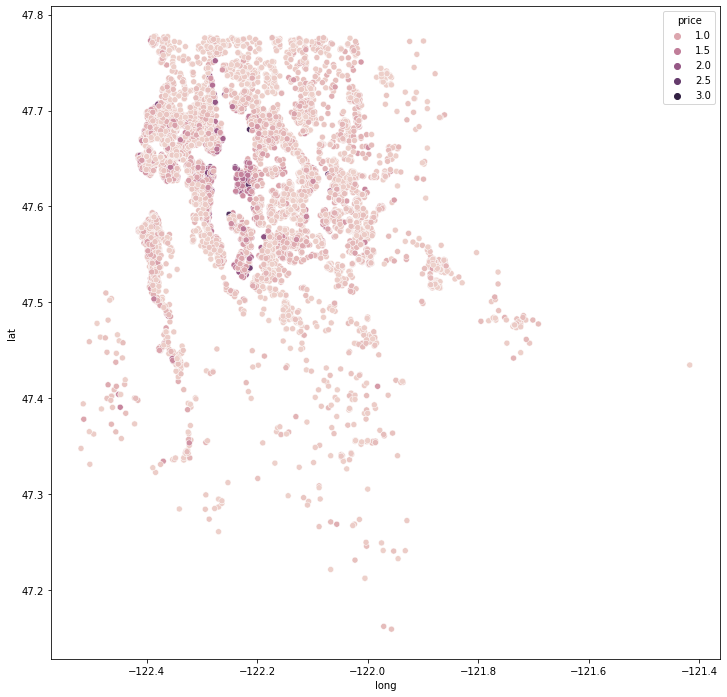

In [20]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=above_500k.loc[above_500k['grades'] < 7],
               hue='price');

In [21]:
houses_under_500k.loc[houses_under_500k['sqft_living'] > 2000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
22,285000.0,5,2.50,2270,6300,2.0,2270,1995,0.0,98092,47.3266,-122.169,2240,7005,0,5.0,0.0,2.0
24,329000.0,3,2.25,2450,6500,2.0,2450,1985,0.0,98030,47.3739,-122.172,2200,6865,0,5.0,0.0,3.0
34,322500.0,4,2.75,2060,6659,1.0,1280,1981,0.0,98058,47.4276,-122.157,2020,8720,780,4.0,0.0,2.0
45,488000.0,3,2.50,3160,13603,2.0,3160,2003,0.0,98019,47.7443,-121.977,3050,9232,0,5.0,0.0,2.0
51,345000.0,5,2.50,3150,9134,1.0,1640,1966,0.0,98056,47.4934,-122.189,1990,9133,1510,5.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21547,341780.0,4,2.75,2260,4440,2.0,2260,2014,0.0,98001,47.3507,-122.291,2260,4563,0,4.0,0.0,2.0
21557,399950.0,3,2.50,3087,5002,2.0,3087,2014,0.0,98023,47.2974,-122.349,2927,5183,0,5.0,0.0,2.0
21571,347500.0,3,2.50,2540,4760,2.0,2540,2010,0.0,98038,47.3452,-122.022,2540,4571,0,5.0,0.0,2.0
21576,350000.0,4,2.75,2500,5995,2.0,2500,2008,0.0,98042,47.3749,-122.107,2530,5988,0,5.0,0.0,2.0


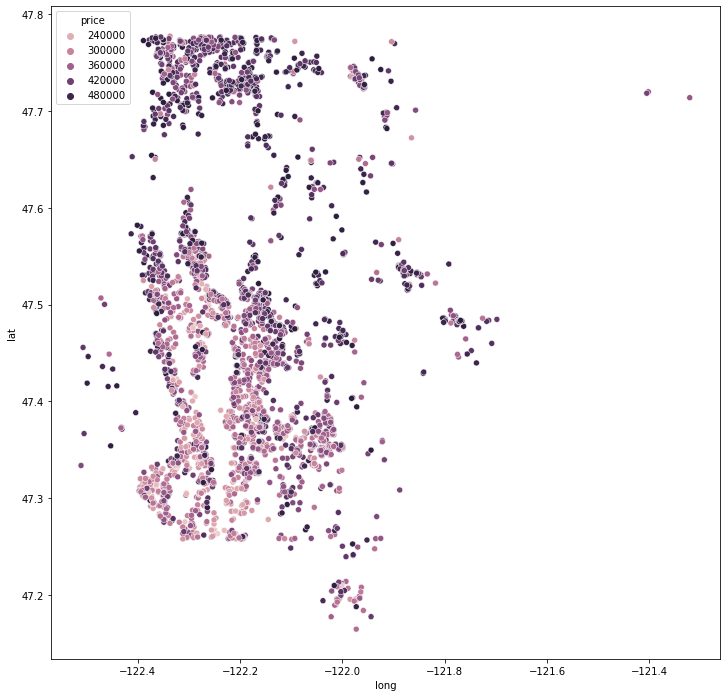

In [22]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=houses_under_500k.loc[houses_under_500k['sqft_living'] > 2000],
               hue='price');

In [23]:
#target_df = df[df['price'].between(450000, 650000)]
target_df = df.loc[df['price'] >= 800000] 

In [24]:
target_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
5,1230000.0,4,4.50,5420,101930,1.0,3890,2001,0.0,98053,47.6561,-122.005,4760,101930,1530,8.0,0.0,2.0
21,2000000.0,3,2.75,3050,44867,1.0,2330,1968,0.0,98040,47.5316,-122.233,4110,20336,720,6.0,0.0,2.0
26,937000.0,3,1.75,2450,2691,2.0,1750,1915,0.0,98119,47.6386,-122.360,1760,3573,700,5.0,0.0,2.0
42,861990.0,5,2.75,3595,5639,2.0,3595,2014,0.0,98053,47.6848,-122.016,3625,5639,0,6.0,0.0,2.0
49,1350000.0,3,2.50,2753,65005,1.0,2165,1953,0.0,98070,47.4041,-122.451,2680,72513,588,6.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,1090000.0,5,3.75,4170,8142,2.0,4170,2006,0.0,98056,47.5354,-122.181,3030,7980,0,7.0,0.0,2.0
21579,1580000.0,4,3.25,3410,10125,2.0,3410,2007,0.0,98040,47.5653,-122.223,2290,10125,0,7.0,0.0,2.0
21581,810000.0,4,3.00,3990,7838,2.0,3990,2003,0.0,98053,47.6857,-122.046,3370,6814,0,6.0,0.0,2.0
21582,1540000.0,5,3.75,4470,8088,2.0,4470,2008,0.0,98004,47.6321,-122.200,2780,8964,0,8.0,0.0,2.0


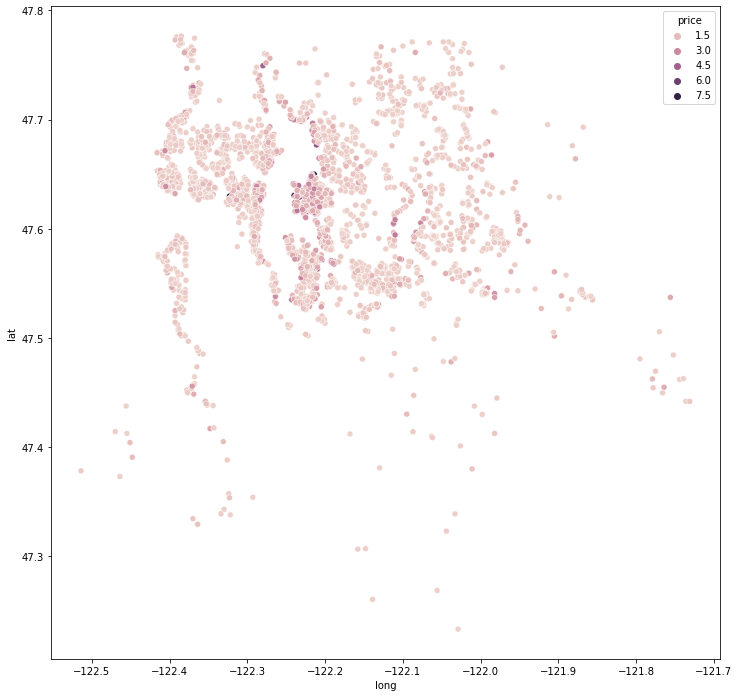

In [25]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=target_df,
               hue='price');

In [26]:
target_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
count,3.000000e+03,3000.000000,3000.00000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1.203345e+06,3.966667,2.89775,3372.903000,2.289503e+04,1.763000,2822.596333,1973.708333,170.004667,98070.790667,47.619777,-122.210106,2843.929333,17315.756000,550.306667,6.290333,0.074667,2.457000
std,5.484658e+05,0.886840,0.83332,1092.722341,6.061375e+04,0.484158,1040.455704,32.524594,557.882106,53.376804,0.066990,0.125036,820.043668,37247.324103,631.849823,1.215126,0.379218,0.692082
min,8.000000e+05,1.000000,1.00000,1050.000000,6.090000e+02,1.000000,710.000000,1900.000000,0.000000,98001.000000,47.233200,-122.514000,900.000000,977.000000,0.000000,3.000000,0.000000,0.000000
25%,8.750000e+05,3.000000,2.50000,2650.000000,6.000000e+03,1.500000,2010.000000,1951.000000,0.000000,98029.000000,47.572350,-122.303000,2230.000000,5777.250000,0.000000,5.000000,0.000000,2.000000
50%,9.986500e+05,4.000000,2.75000,3240.000000,9.690500e+03,2.000000,2700.000000,1983.000000,0.000000,98065.000000,47.628700,-122.214000,2830.000000,9490.000000,355.000000,6.000000,0.000000,2.000000
75%,1.320000e+06,4.000000,3.50000,3920.000000,1.667500e+04,2.000000,3480.000000,2001.250000,0.000000,98112.000000,47.665100,-122.122750,3390.000000,14841.250000,1000.000000,7.000000,0.000000,3.000000
max,7.700000e+06,10.000000,8.00000,13540.000000,1.024068e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.776400,-121.731000,6210.000000,871200.000000,4820.000000,10.000000,2.000000,4.000000


In [27]:
relevant_columns = [    
 'bedrooms',    
 'bathrooms',  
 'sqft_living',  
 'sqft_lot',    
 'floors',    
 'waterfront', 
 'condition',
 'grades',
 'sqft_above',
 'sqft_basment_calc',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15'
]

### BREAK

## Regression with Target Data Set

Investigate correlation between features.

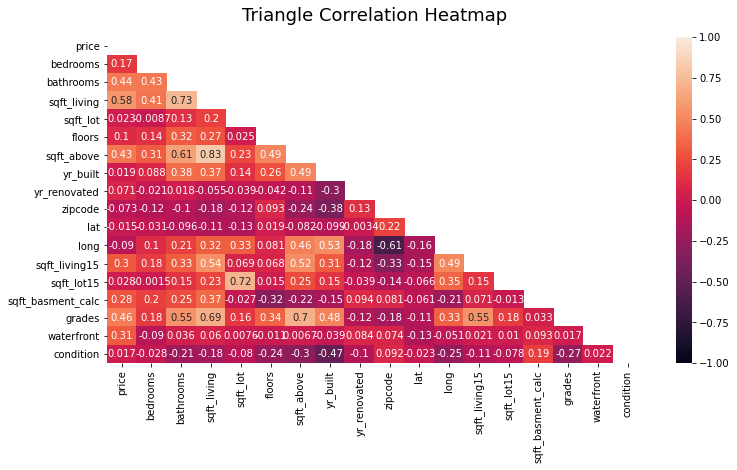

In [28]:
plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(target_df.corr(), dtype=bool))
heatmap = sns.heatmap(target_df.corr(), mask=mask, vmin=-1, vmax=1, annot = True);
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Run simple regression with sqft_living as it is the highest correlated. 

In [29]:
y = target_df['price']
X = target_df['sqft_living']

In [30]:
target = sm.OLS(y, sm.add_constant(X)).fit()
target.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     1488.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          1.21e-264
Time:                        17:02:43   Log-Likelihood:                -43297.
No. Observations:                3000   AIC:                         8.660e+04
Df Residuals:                    2998   BIC:                         8.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.284e+05   2.66e+04      8.596      0.000    1.76e+05     2.8e+05
sqft_living   289.0543      7.494     38.570      0.000     274.360     303.749
==============================================================================
Omnibus:                     1425.794   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14119.598
Skew:                           2.013   Prob(JB):                         0.00
Kurtosis:                      12.836   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Initial interpretation:** 
- R2 value is low at 33%.
- Sq feet is significant because p value is less than 0.05.
- Need to investigate multicollinearity. 

## Run Multiple Linear Regression  

In [31]:
y = target_df['price']
X = target_df.loc[:, relevant_columns]

In [32]:
target = sm.OLS(y, sm.add_constant(X)).fit()
target.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     261.7
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:02:43   Log-Likelihood:                -42586.
No. Observations:                3000   AIC:                         8.521e+04
Df Residuals:                    2983   BIC:                         8.531e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.833e+07   1.48e+07      1.242      0.214   -1.06e+07    4.73e+07
bedrooms          -4.556e+04   8586.328     -5.306      0.000   -6.24e+04   -2.87e+04
bathrooms          7.344e+04   1.24e+04      5.937      0.000    4.92e+04    9.77e+04
sqft_living         157.9629      7.373     21.425      0.000     143.507     172.419
sqft_lot              0.3417      0.158      2.159      0.031       0.031       0.652
floors            -6.953e+04   1.71e+04     -4.066      0.000   -1.03e+05    -3.6e+04
waterfront         3.939e+05   1.76e+04     22.394      0.000    3.59e+05    4.28e+05
condition          2.457e+04   1.14e+04      2.159      0.031    2260.246    4.69e+04
grades             9.936e+04   8584.710     11.574      0.000    8.25e+04    1.16e+05
sqft_above          115.6167      7.676     15.063      0.000     100.566     130.667
sqft_basment_calc    42.3399      8.506      4.978      0.000      25.662      59.018
yr_built          -3042.2233    304.692     -9.985      0.000   -3639.651   -2444.795
yr_renovated         19.5906     13.002      1.507      0.132      -5.904      45.085
zipcode           -2877.8600    162.531    -17.707      0.000   -3196.543   -2559.177
lat                7.828e+05   1.02e+05      7.675      0.000    5.83e+05    9.83e+05
long                -1.9e+06   8.47e+04    -22.421      0.000   -2.07e+06   -1.73e+06
sqft_living15        48.2030     11.200      4.304      0.000      26.242      70.164
sqft_lot15           -0.7197      0.255     -2.819      0.005      -1.220      -0.219
==============================================================================
Omnibus:                     1179.785   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13051.636
Skew:                           1.548   Prob(JB):                         0.00
Kurtosis:                      12.738   Cond. No.                     4.69e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.5e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Interpretation**
- Model explains 58% of varience of sale price. 
- Year renovated was only nonsignificant coefficients, will drop on next iteration. 
- several issues with multicollinearity. 

In [33]:
X_dropped1 = target_df.drop(columns=(['price', 'yr_renovated']))
target1 = sm.OLS(y, sm.add_constant(X_dropped1)).fit()
target1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     278.8
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:02:43   Log-Likelihood:                -42587.
No. Observations:                3000   AIC:                         8.521e+04
Df Residuals:                    2984   BIC:                         8.530e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.982e+07   1.47e+07      1.346      0.179   -9.06e+06    4.87e+07
bedrooms          -4.625e+04   8576.065     -5.393      0.000   -6.31e+04   -2.94e+04
bathrooms          7.609e+04   1.22e+04      6.213      0.000    5.21e+04       1e+05
sqft_living         157.9952      7.374     21.425      0.000     143.536     172.454
sqft_lot              0.3368      0.158      2.128      0.033       0.026       0.647
floors            -6.953e+04   1.71e+04     -4.065      0.000   -1.03e+05    -3.6e+04
sqft_above          115.1898      7.672     15.015      0.000     100.148     130.232
yr_built          -3204.9334    284.973    -11.246      0.000   -3763.697   -2646.170
zipcode           -2889.3758    162.385    -17.793      0.000   -3207.774   -2570.977
lat                7.765e+05   1.02e+05      7.618      0.000    5.77e+05    9.76e+05
long              -1.902e+06   8.47e+04    -22.447      0.000   -2.07e+06   -1.74e+06
sqft_living15        47.6071     11.196      4.252      0.000      25.655      69.559
sqft_lot15           -0.7136      0.255     -2.794      0.005      -1.214      -0.213
sqft_basment_calc    42.8121      8.503      5.035      0.000      26.140      59.484
grades              9.91e+04   8584.809     11.543      0.000    8.23e+04    1.16e+05
waterfront         3.956e+05   1.76e+04     22.526      0.000    3.61e+05     4.3e+05
condition          1.948e+04   1.09e+04      1.792      0.073   -1830.173    4.08e+04
==============================================================================
Omnibus:                     1183.883   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13184.996
Skew:                           1.553   Prob(JB):                         0.00
Kurtosis:                      12.790   Cond. No.                     4.65e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.53e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Interpretation**
- Model still explains 58% of varience of sale price. 
- Condtion is now not significant, will drop on next iteration. 
- Still several issues with multicollinearity. 

In [34]:
X_dropped2 = target_df.drop(columns=(['price', 'yr_renovated', 'condition']))
target2 = sm.OLS(y, sm.add_constant(X_dropped2)).fit()
target2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     298.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:02:43   Log-Likelihood:                -42588.
No. Observations:                3000   AIC:                         8.521e+04
Df Residuals:                    2985   BIC:                         8.530e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.223e+07   1.47e+07      1.515      0.130   -6.54e+06     5.1e+07
bedrooms          -4.606e+04   8578.581     -5.369      0.000   -6.29e+04   -2.92e+04
bathrooms          7.544e+04   1.22e+04      6.160      0.000    5.14e+04    9.94e+04
sqft_living         158.5789      7.370     21.517      0.000     144.129     173.029
sqft_lot              0.3344      0.158      2.112      0.035       0.024       0.645
floors             -7.08e+04   1.71e+04     -4.141      0.000   -1.04e+05   -3.73e+04
sqft_above          114.1648      7.653     14.918      0.000      99.159     129.170
yr_built          -3376.1363    268.587    -12.570      0.000   -3902.772   -2849.501
zipcode           -2915.3529    161.797    -18.019      0.000   -3232.598   -2598.108
lat                7.665e+05   1.02e+05      7.528      0.000    5.67e+05    9.66e+05
long               -1.91e+06   8.47e+04    -22.568      0.000   -2.08e+06   -1.74e+06
sqft_living15        48.5682     11.187      4.342      0.000      26.634      70.503
sqft_lot15           -0.7072      0.255     -2.769      0.006      -1.208      -0.206
sqft_basment_calc    44.4250      8.458      5.252      0.000      27.841      61.009
grades             9.863e+04   8583.972     11.490      0.000    8.18e+04    1.15e+05
waterfront         3.954e+05   1.76e+04     22.510      0.000    3.61e+05     4.3e+05
==============================================================================
Omnibus:                     1177.475   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13059.042
Skew:                           1.543   Prob(JB):                         0.00
Kurtosis:                      12.744   Cond. No.                     5.21e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Interpretation**
- Model explains 58% of varience of sale price. 
- All features are significant. 
- Several issues with multicollinearity, condition number is extremely high at 5.3 x 10^16

## Invesitgate Multicollinearity 

In [35]:
#code from multicollinearity lab

target_df_multico = target_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
target_df_multico['pairs'] = list(zip(target_df_multico.level_0, target_df_multico.level_1))
target_df_multico.set_index(['pairs'], inplace = True)
target_df_multico.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
target_df_multico.columns = ['cc']
target_df_multico.drop_duplicates(inplace=True)
target_df_multico[(target_df_multico.cc>.75) & (target_df_multico.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.825626


Based on the results above we will rerun the model without sqft_above.

In [36]:
X_dropped3 = target_df.drop(columns=(['price', 'yr_renovated', 'condition',
                                     'sqft_above']))
target3 = sm.OLS(y, sm.add_constant(X_dropped3)).fit()
target3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     298.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:02:43   Log-Likelihood:                -42588.
No. Observations:                3000   AIC:                         8.521e+04
Df Residuals:                    2985   BIC:                         8.530e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.223e+07   1.47e+07      1.515      0.130   -6.54e+06     5.1e+07
bedrooms          -4.606e+04   8578.581     -5.369      0.000   -6.29e+04   -2.92e+04
bathrooms          7.544e+04   1.22e+04      6.160      0.000    5.14e+04    9.94e+04
sqft_living         272.7437     12.419     21.961      0.000     248.393     297.095
sqft_lot              0.3344      0.158      2.112      0.035       0.024       0.645
floors             -7.08e+04   1.71e+04     -4.141      0.000   -1.04e+05   -3.73e+04
yr_built          -3376.1363    268.587    -12.570      0.000   -3902.772   -2849.501
zipcode           -2915.3529    161.797    -18.019      0.000   -3232.598   -2598.108
lat                7.665e+05   1.02e+05      7.528      0.000    5.67e+05    9.66e+05
long               -1.91e+06   8.47e+04    -22.568      0.000   -2.08e+06   -1.74e+06
sqft_living15        48.5682     11.187      4.342      0.000      26.634      70.503
sqft_lot15           -0.7072      0.255     -2.769      0.006      -1.208      -0.206
sqft_basment_calc   -69.7398     14.349     -4.860      0.000     -97.875     -41.605
grades             9.863e+04   8583.972     11.490      0.000    8.18e+04    1.15e+05
waterfront         3.954e+05   1.76e+04     22.510      0.000    3.61e+05     4.3e+05
==============================================================================
Omnibus:                     1177.475   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13059.042
Skew:                           1.543   Prob(JB):                         0.00
Kurtosis:                      12.744   Cond. No.                     2.38e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretation**

- Model explains 58% of varience of sale price.
- All features are significant with sqft_lot being least significant.
- Mlticollinearity is still very high, but condition number decreased from 5.3 x 10^16 to 2.4 x 10^8

We would like to further explore the following features: 
- number of bathrooms
- sq foot of living space
- grades
- location: 
    - Latitude
    - Waterfront 

***

## Grade exploration

Definition of grades from https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

**BUILDING GRADE**
    	Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [37]:
y = target_df['price']
X_grade = target_df['grades']

In [38]:
target_grade = sm.OLS(y, sm.add_constant(X_grade)).fit()
target_grade.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     802.1
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          1.44e-156
Time:                        17:02:43   Log-Likelihood:                -43545.
No. Observations:                3000   AIC:                         8.709e+04
Df Residuals:                    2998   BIC:                         8.711e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.011e+05   4.69e+04     -2.155      0.031   -1.93e+05   -9099.392
grades      2.074e+05   7322.017     28.321      0.000    1.93e+05    2.22e+05
==============================================================================
Omnibus:                     2196.330   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61940.445
Skew:                           3.159   Prob(JB):                         0.00
Kurtosis:                      24.345   Cond. No.                         34.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# initial interpretations, R2 value is low but grades are significant. 

In [40]:
target_df['grades'].value_counts()

6.0     955
7.0     774
5.0     611
8.0     379
4.0     168
9.0      89
10.0     13
3.0      11
Name: grades, dtype: int64

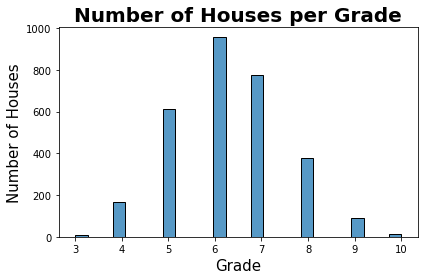

In [41]:
sns.histplot(target_df['grades'])
plt.title('Number of Houses per Grade', fontsize =20, weight = 'bold')
plt.ylabel('Number of Houses', fontsize =15)
plt.xlabel('Grade', fontsize =15)
plt.tight_layout();

In [42]:
# grades for target housing market appears mostly normally distributed. 
# the majority of the houses have grades between 6 and 7

### Investigate relationship between price and grades.

In [43]:
target_grades_mean = target_df.groupby('grades')['price'].mean()
target_grades_mean

grades
3.0     9.739091e+05
4.0     9.245640e+05
5.0     1.002244e+06
6.0     1.079464e+06
7.0     1.256389e+06
8.0     1.540967e+06
9.0     2.202528e+06
10.0    3.710769e+06
Name: price, dtype: float64

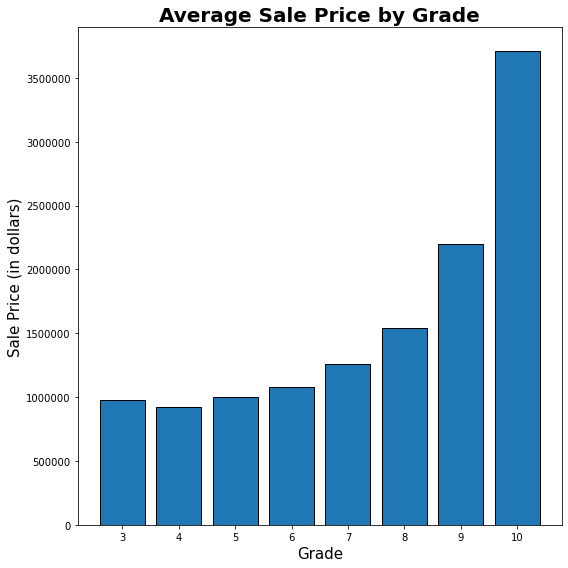

In [44]:
fig, ax = plt.subplots(figsize = (8, 8))


ax.bar(x = target_grades_mean.index, height = target_grades_mean, edgecolor ='black')
plt.ticklabel_format(style='plain', axis = 'y')
plt.title('Average Sale Price by Grade', fontsize =20, weight = 'bold')
plt.ylabel('Sale Price (in dollars)', fontsize =15)
plt.xlabel('Grade', fontsize =15)
plt.tight_layout();

In [45]:
# as shown in the LR model, the sale price increases as grade increases. 

## Exploring grade in relation to other key features

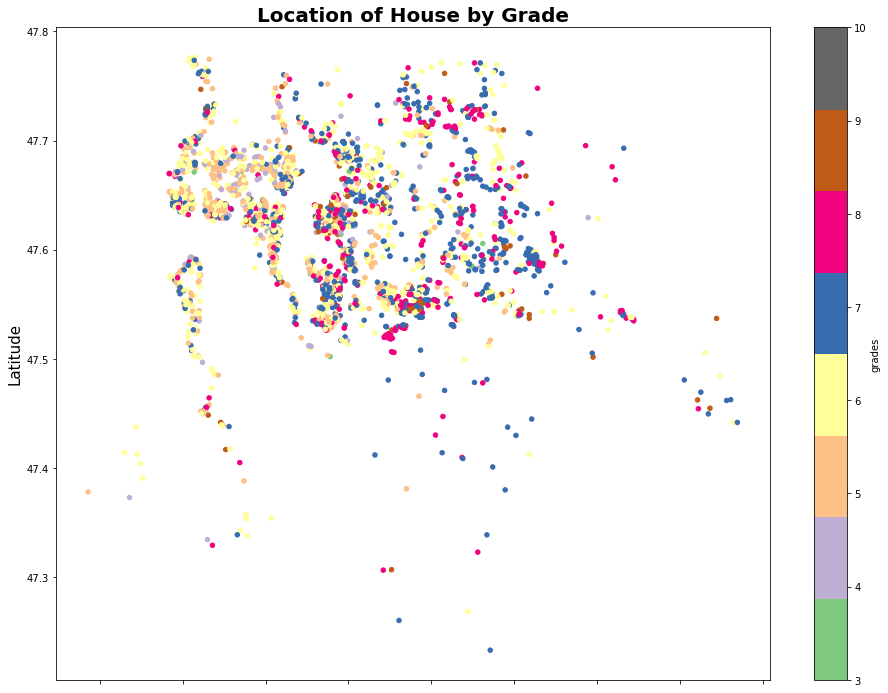

In [46]:
target_df.plot(kind = 'scatter', x='long', y='lat', figsize=(16,12), 
        c= 'grades', cmap = 'Accent')
plt.title('Location of House by Grade', fontsize =20, weight = 'bold')
plt.ylabel('Latitude', fontsize =15)
plt.xlabel('Longitude', fontsize =15);

Based on the map grades 5 and 6 seem to be clustered closer to Seattle while higher grades are located more in the eastern part of the county. 

In [47]:
grade_sqft= target_df.groupby('grades')['sqft_living'].mean()
grade_sqft

grades
3.0     1571.818182
4.0     2157.380952
5.0     2638.294599
6.0     3151.380105
7.0     3687.519380
8.0     4428.390501
9.0     5479.022472
10.0    7483.076923
Name: sqft_living, dtype: float64

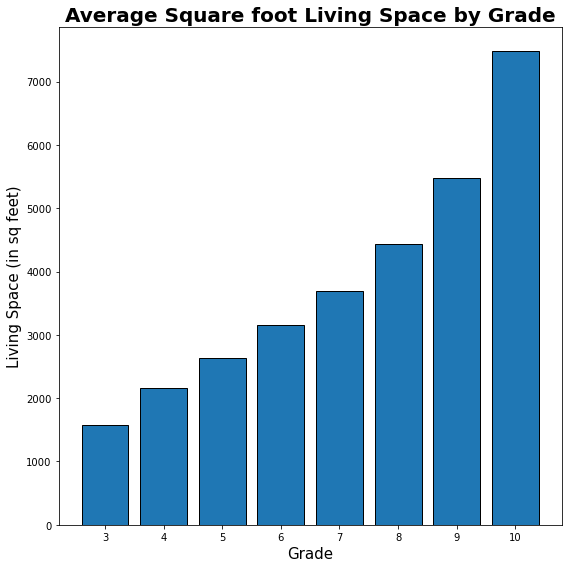

In [48]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.bar(x = grade_sqft.index, height = grade_sqft, edgecolor ='black')
plt.ticklabel_format(style='plain', axis = 'y')
plt.title('Average Square foot Living Space by Grade', fontsize =20, weight = 'bold')
plt.ylabel('Living Space (in sq feet)', fontsize =15)
plt.xlabel('Grade', fontsize =15)
plt.tight_layout();

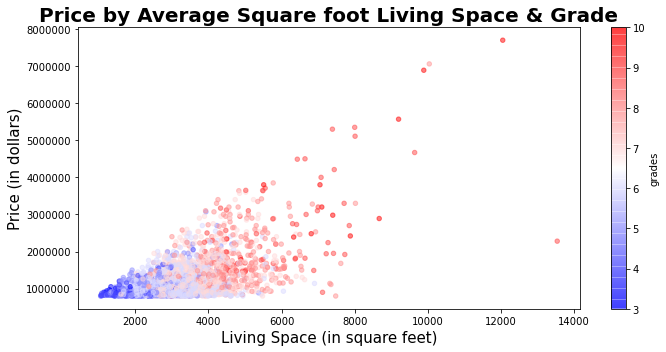

In [49]:
# highend_800["price"] = target_df["price"] - target_df["price"].mean()
# highend_800["grades"] = highend_800["grades"]
fig, ax = plt.subplots(figsize=(10,5))
target_df.plot.scatter(x="sqft_living", y="price", c='grades', cmap="bwr", alpha=0.5, ax=ax);
plt.title('Price by Average Square foot Living Space & Grade', fontsize =20, weight = 'bold')
plt.ylabel(('Price (in dollars)'), fontsize =15)
#ax.set_yticklabels(['$1','$2', '$3', '$4', '$5', '$6', '$7', '$8'])
plt.xlabel(('Living Space (in square feet)'), fontsize =15)
plt.ticklabel_format(style='plain', axis = 'y')
plt.tight_layout();

Sales price, square feet of living space and grade appear to highly related. Based on the graph as squarefoot increases both the price and grade. 

***

## Visualizations of key features

''

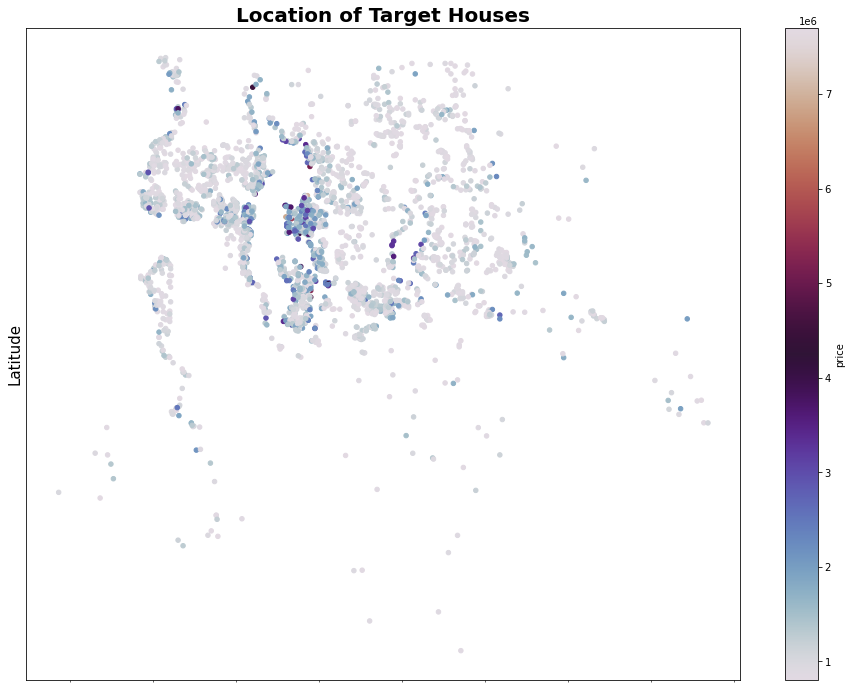

In [50]:
target_df.plot(kind = 'scatter', x='long', y='lat', figsize=(16,12), 
        c= 'price', cmap = 'twilight')
plt.title('Location of Target Houses', fontsize =20, weight = 'bold')
plt.xlabel('Longitude', fontsize =15)
plt.ylabel('Latitude', fontsize =15)


plt.xticks([])
plt.yticks([])

;


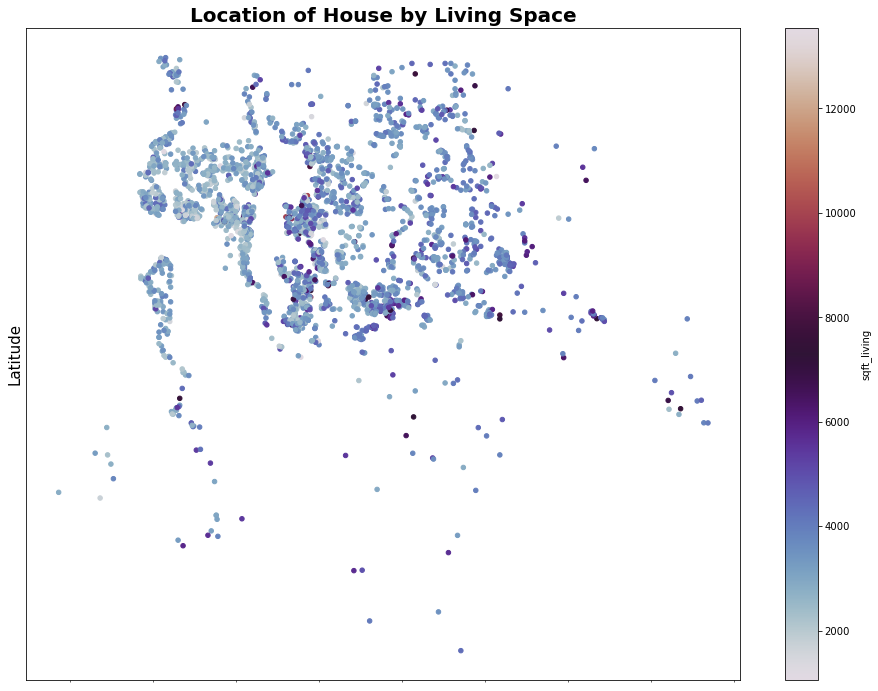

In [51]:
target_df.plot(kind = 'scatter', x='long', y='lat', figsize=(16,12), 
        c= 'sqft_living', cmap = 'twilight')
plt.title('Location of House by Living Space', fontsize =20, weight = 'bold')
plt.ylabel('Latitude', fontsize =15)
plt.xlabel('Longitude', fontsize =15)

plt.xticks([])
plt.yticks([]);

***

# break

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
X_train = X_train.loc[:, relevant_columns]

# Visually inspect X_train
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grades,sqft_above,sqft_basment_calc,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21155,4,2.50,2580,3436,2.0,0.0,2.0,5.0,2580,0,2013,0.0,98033,47.6853,-122.210,1780,5772
2464,4,2.50,3160,4620,1.5,0.0,2.0,6.0,2020,1140,1917,0.0,98116,47.5875,-122.382,2790,5308
8042,4,2.50,4120,14866,1.0,2.0,2.0,5.0,2070,2050,1965,0.0,98006,47.5571,-122.193,3620,19729
11578,4,2.75,3020,8622,2.0,0.0,2.0,6.0,3020,0,1976,2003.0,98004,47.5866,-122.201,3060,14303
5303,4,2.50,3400,35062,2.0,0.0,3.0,8.0,3400,0,1988,0.0,98052,47.7168,-122.113,2880,9705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,2.75,3240,7200,1.0,0.0,2.0,5.0,1620,1620,1960,0.0,98118,47.5670,-122.273,2700,7200
8023,5,4.50,3820,5750,2.0,0.0,2.0,6.0,2830,990,2000,0.0,98116,47.5581,-122.385,1750,5750
8371,4,2.50,3530,49222,2.0,0.0,3.0,6.0,3530,0,1986,0.0,98072,47.7285,-122.112,3750,49222
9657,4,3.25,4060,20822,2.0,0.0,2.0,7.0,4060,0,1991,0.0,98077,47.7213,-122.055,4170,23958


In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

cross_val_score(model, X_train, y_train, cv=3)

array([0.58227253, 0.5673251 , 0.5804063 ])

In [55]:
X_test = X_test.loc[:, relevant_columns]

In [56]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5687714073684551

In [57]:
target_reg = sm.OLS(y, sm.add_constant(X)).fit()

target_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     261.7
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:02:44   Log-Likelihood:                -42586.
No. Observations:                3000   AIC:                         8.521e+04
Df Residuals:                    2983   BIC:                         8.531e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.833e+07   1.48e+07      1.242      0.214   -1.06e+07    4.73e+07
bedrooms          -4.556e+04   8586.328     -5.306      0.000   -6.24e+04   -2.87e+04
bathrooms          7.344e+04   1.24e+04      5.937      0.000    4.92e+04    9.77e+04
sqft_living         157.9629      7.373     21.425      0.000     143.507     172.419
sqft_lot              0.3417      0.158      2.159      0.031       0.031       0.652
floors            -6.953e+04   1.71e+04     -4.066      0.000   -1.03e+05    -3.6e+04
waterfront         3.939e+05   1.76e+04     22.394      0.000    3.59e+05    4.28e+05
condition          2.457e+04   1.14e+04      2.159      0.031    2260.246    4.69e+04
grades             9.936e+04   8584.710     11.574      0.000    8.25e+04    1.16e+05
sqft_above          115.6167      7.676     15.063      0.000     100.566     130.667
sqft_basment_calc    42.3399      8.506      4.978      0.000      25.662      59.018
yr_built          -3042.2233    304.692     -9.985      0.000   -3639.651   -2444.795
yr_renovated         19.5906     13.002      1.507      0.132      -5.904      45.085
zipcode           -2877.8600    162.531    -17.707      0.000   -3196.543   -2559.177
lat                7.828e+05   1.02e+05      7.675      0.000    5.83e+05    9.83e+05
long                -1.9e+06   8.47e+04    -22.421      0.000   -2.07e+06   -1.73e+06
sqft_living15        48.2030     11.200      4.304      0.000      26.242      70.164
sqft_lot15           -0.7197      0.255     -2.819      0.005      -1.220      -0.219
==============================================================================
Omnibus:                     1179.785   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13051.636
Skew:                           1.548   Prob(JB):                         0.00
Kurtosis:                      12.738   Cond. No.                     4.69e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.5e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
lr = RandomForestRegressor(n_estimators=15)
lr_model = lr.fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.72
